## Cargar librerias y datos 

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

C:\Users\angie\AppData\Local\Temp\ipykernel_18212\210727464.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
df = pd.read_excel(r'C:\Users\angie\OneDrive\Desktop\Octavo semestre\Analitica computacional\Proyecto 2 personal\data2.xlsx')
X = df[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X18','X19','X20','X21','X22','X23']]
y = df["Y"]


In [8]:
print(X)

           X1  X2  X3  X4  X5  X6  X7  X8  X9  X10  X11    X18    X19    X20  \
0       20000   2   2   1  24   2   2  -1  -1   -2   -2      0    689      0   
1      120000   2   2   2  26  -1   2  -1  -1   -1    2      0   1000   1000   
2       90000   2   2   2  34  -1  -1  -1  -1   -1   -1   1518   1500   1000   
3       50000   2   2   1  37  -1  -1  -1  -1   -1   -1   2000   2019   1200   
4       50000   1   2   1  57  -1  -1  -1  -1   -1   -1   2000  36681  10000   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...    ...    ...    ...   
29995  220000   1   3   1  39  -1  -1  -1  -1   -1   -1   8500  20000   5003   
29996  150000   1   3   2  43  -1  -1  -1  -1   -1   -1   1837   3526   8998   
29997   30000   1   2   2  37   4   3   2  -1   -1   -1      0      0  22000   
29998   80000   1   3   1  41   1  -1  -1  -1   -1   -1  85900   3409   1178   
29999   50000   1   2   1  46  -1  -1  -1  -1   -1   -1   2078   1800   1430   

        X21    X22   X23  
0         0 

## Entrenamiento de datos 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)
y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [12]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(17,)))
model.add(tf.keras.layers.Dense(15, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(9, activation="softmax"))
model.add(tf.keras.layers.Dense(5, activation="softmax"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

In [14]:
history = model.fit(X_train_scaled, y_train_one_hot, epochs=50, 
                    validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/50


750/750 [==============================] - 6s 2ms/step - loss: 0.5565 - accuracy: 0.7113 - val_loss: 0.4694 - val_accuracy: 0.7812
Epoch 2/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4588 - accuracy: 0.7957 - val_loss: 0.4519 - val_accuracy: 0.8070
Epoch 3/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.8121 - val_loss: 0.4437 - val_accuracy: 0.8152
Epoch 4/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4425 - accuracy: 0.8175 - val_loss: 0.4398 - val_accuracy: 0.8182
Epoch 5/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4396 - accuracy: 0.8189 - val_loss: 0.4373 - val_accuracy: 0.8193
Epoch 6/50
750/750 [==============================] - 1s 2ms/step - loss: 0.4379 - accuracy: 0.8201 - val_loss: 0.4367 - val_accuracy: 0.8202
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 0.4367 - accuracy: 0.8204 - val_loss: 0.4360 - val_accuracy: 0.8202
Epoc

## Grafica de metricas 

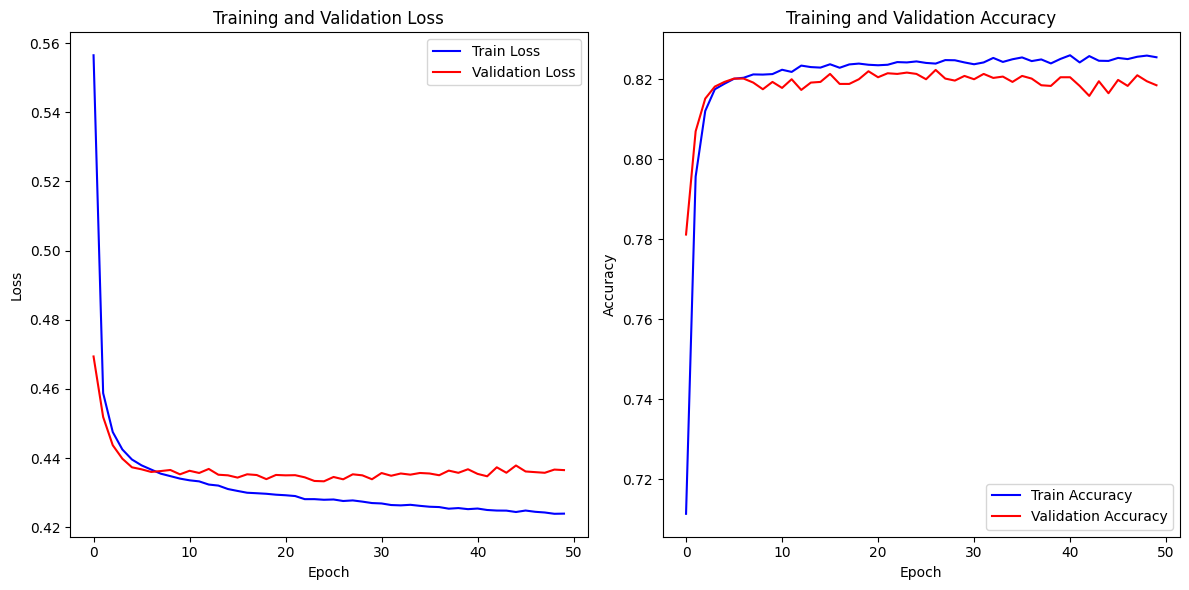

In [15]:
import matplotlib.pyplot as plt

# Obtener la pérdida y la precisión del entrenamiento y la validación desde history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Crear gráficos
plt.figure(figsize=(12, 6))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
model.save("modelo.keras")

## Predicción del modelo

In [16]:
import numpy as np

# datos de la 1 fila para comprobar 
datos = np.array([[10000, 2, 2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000]])

# Escalar los datos
datos_scaled = scaler.transform(datos)

# Predicción de los datos
prediction = model.predict(datos)

# Un umbral para la predicción binaria
threshold = 0.5

# Obtener la probabilidad predicha
predicted_probability = prediction[0, 1]  

# Aplicar el umbral para obtener la predicción binaria
binary_prediction = 1 if predicted_probability > threshold else 0

# Mostrar la predicción binaria
print("Predicción:", binary_prediction)


c:\Users\angie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 177ms/step
Predicción: 1


In [3]:
 import psycopg2
 engine = psycopg2.connect(
 dbname="postgres",
 user="postgres",
 password="proyecto2",
 host="proyecto.c5ak6w0igl7a.us-east-1.rds.amazonaws.com",
 port=5432
 )
 

In [4]:
cursor = engine.cursor()

In [5]:
query = """
SELECT * 
FROM pg_catalog.pg_tables 
WHERE schemaname='public';"""
cursor.execute(query)
result = cursor.fetchall()
result

[]